<a href="https://colab.research.google.com/github/Trieunguyen1/BAI_TAP_AI/blob/main/Nhan_dien_10_loai_trai_cay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/10_loai_trai_cay/train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/10_loai_trai_cay/test',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 787 images belonging to 10 classes.
Found 319 images belonging to 10 classes.


In [4]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [5]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [6]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
25/25 [==============================] - 295s 12s/step - loss: 4.4145 - accuracy: 0.3227 - val_loss: 1.4765 - val_accuracy: 0.4389
Epoch 2/100
25/25 [==============================] - 75s 3s/step - loss: 1.0872 - accuracy: 0.6518 - val_loss: 1.0123 - val_accuracy: 0.6771
Epoch 3/100
25/25 [==============================] - 75s 3s/step - loss: 0.7314 - accuracy: 0.7484 - val_loss: 0.7557 - val_accuracy: 0.7335
Epoch 4/100
25/25 [==============================] - 75s 3s/step - loss: 0.5856 - accuracy: 0.7789 - val_loss: 0.9007 - val_accuracy: 0.6865
Epoch 5/100
25/25 [==============================] - 75s 3s/step - loss: 0.4894 - accuracy: 0.8234 - val_loss: 0.6591 - val_accuracy: 0.7868
Epoch 6/100
25/25 [==============================] - 75s 3s/step - loss: 0.3160 - accuracy: 0.8895 - val_loss: 0.7560 - val_accuracy: 0.7555
Epoch 7/100
25/25 [==============================] - 75s 3s/step - loss: 0.3379 - accuracy: 0.8793 - val_loss: 0.7989 - val_accuracy: 0.7618
Epoch 8/100

Sai số kiểm tra là:  0.8837857842445374
Độ chính xác kiểm tra là:  0.8620689511299133


<function matplotlib.pyplot.show>

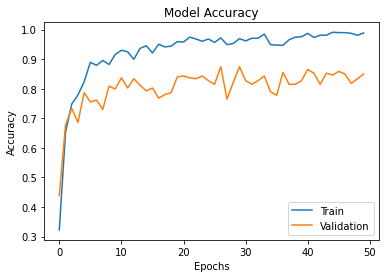

In [7]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [8]:
model.save('model_10_loai_trai_cay.h5')
model=load_model('model_10_loai_trai_cay.h5')

mangcut


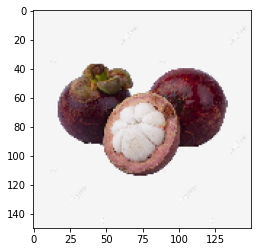

In [10]:
img=load_img("/content/drive/MyDrive/10_loai_trai_cay/prediction/mangcut.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='chuoi'
if round(result[0][1])==1:
  prediction='dautay'
if round(result[0][2])==1:
  prediction='duahau'
if round(result[0][3])==1:
  prediction='khe'
if round(result[0][4])==1:
  prediction='mangcut'
if round(result[0][5])==1:
  prediction='saurieng'
if round(result[0][6])==1:
  prediction='tao'
if round(result[0][7])==1:
  prediction='thanhlong'
if round(result[0][8])==1:
  prediction='thom'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

mangcut


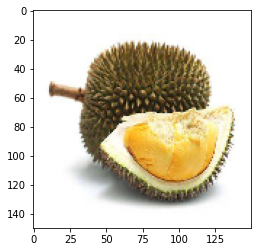

In [12]:
img=load_img("/content/drive/MyDrive/10_loai_trai_cay/prediction/saurieng.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='chuoi'
if round(result[0][1])==1:
  prediction='dautay'
if round(result[0][2])==1:
  prediction='duahau'
if round(result[0][3])==1:
  prediction='khe'
if round(result[0][4])==1:
  prediction='mangcut'
if round(result[0][5])==1:
  prediction='saurieng'
if round(result[0][6])==1:
  prediction='tao'
if round(result[0][7])==1:
  prediction='thanhlong'
if round(result[0][8])==1:
  prediction='thom'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

tao


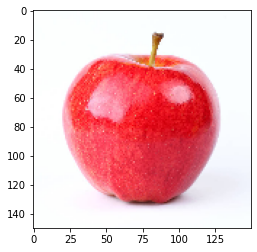

In [13]:
img=load_img("/content/drive/MyDrive/10_loai_trai_cay/prediction/tao.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='chuoi'
if round(result[0][1])==1:
  prediction='dautay'
if round(result[0][2])==1:
  prediction='duahau'
if round(result[0][3])==1:
  prediction='khe'
if round(result[0][4])==1:
  prediction='mangcut'
if round(result[0][5])==1:
  prediction='saurieng'
if round(result[0][6])==1:
  prediction='tao'
if round(result[0][7])==1:
  prediction='thanhlong'
if round(result[0][8])==1:
  prediction='thom'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

saurieng


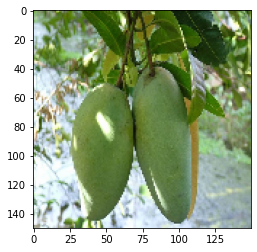

In [14]:
img=load_img("/content/drive/MyDrive/10_loai_trai_cay/prediction/xoai.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='chuoi'
if round(result[0][1])==1:
  prediction='dautay'
if round(result[0][2])==1:
  prediction='duahau'
if round(result[0][3])==1:
  prediction='khe'
if round(result[0][4])==1:
  prediction='mangcut'
if round(result[0][5])==1:
  prediction='saurieng'
if round(result[0][6])==1:
  prediction='tao'
if round(result[0][7])==1:
  prediction='thanhlong'
if round(result[0][8])==1:
  prediction='thom'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)